# Classification


In [1]:
# Import library
# Library for preprocessing data
import pandas as pd
import numpy as np

# Library for visualization
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt


In [2]:

# Load the digits dataset: digits
digits = datasets.load_digits()

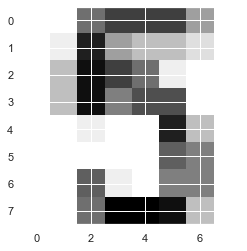

In [3]:
# Display image 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target
  
# Split into training and test set
x_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

print("Accuracy: {0}".format(knn.score(X_test, y_test)))


Accuracy: 0.9861111111111112


In [6]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over
for i, k in enumerate(neighbors):
    
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(x_train, y_train)

  test_accuracy[i] = knn.score(X_test, y_test)

  train_accuracy[i] = knn.score(x_train, y_train)


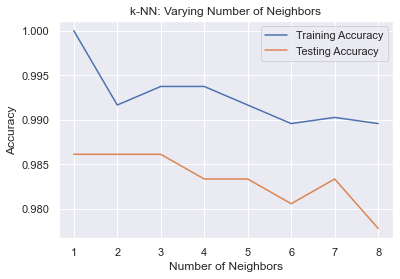

In [7]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [8]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [9]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

In [10]:
print("Number of training examples", mnist.data.shape)
print("Image information", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x12C6EB310>, 5)


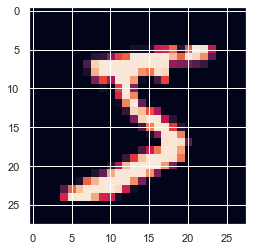

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [12]:
class Net(nn.Module):
    def __init__ (self):
        super(Net, self).__init__()
        
        self.fully = nn.Sequential(
            nn.Linear(28*28, 10)
        )
        
    def forward(self, x):
        x = x.view([-1,28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim=1)
        return x

In [13]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [14]:
def train():
    learning_rate = 1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)
    
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)
            
            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                print("Epoch = %f. Batch = %s. Loss = %s" % (epoch, batch_idx, loss.item()))
    return net

In [15]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.2899856567382812
Epoch = 0.000000. Batch = 100. Loss = 0.7440752983093262
Epoch = 0.000000. Batch = 200. Loss = 0.648048996925354
Epoch = 0.000000. Batch = 300. Loss = 0.47537046670913696
Epoch = 0.000000. Batch = 400. Loss = 0.5437594652175903
Epoch = 0.000000. Batch = 500. Loss = 0.23693391680717468
Epoch = 0.000000. Batch = 600. Loss = 0.4659498631954193
Epoch = 0.000000. Batch = 700. Loss = 0.21711580455303192
Epoch = 0.000000. Batch = 800. Loss = 0.24938775599002838
Epoch = 0.000000. Batch = 900. Loss = 0.4482290744781494
Epoch = 1.000000. Batch = 0. Loss = 0.5425832867622375
Epoch = 1.000000. Batch = 100. Loss = 0.3192919194698334
Epoch = 1.000000. Batch = 200. Loss = 0.367459237575531
Epoch = 1.000000. Batch = 300. Loss = 0.23657181859016418
Epoch = 1.000000. Batch = 400. Loss = 0.47094225883483887
Epoch = 1.000000. Batch = 500. Loss = 0.23364010453224182
Epoch = 1.000000. Batch = 600. Loss = 0.5168497562408447
Epoch = 1.000000. Batch = 700.

net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim=True)[1]
    correct += target.eq(pred.view_as(target)).sum()

print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()/total*100)


# Linear Regression

In [16]:
# Load the dataset
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('./gapminder.csv')

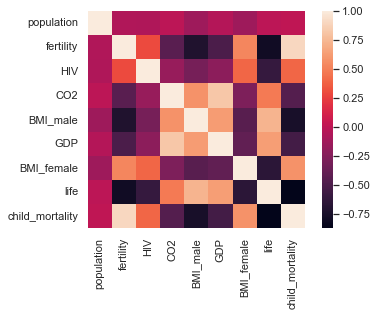

In [17]:
ax = sns.heatmap(df.corr(), square=True)
plt.show()

0.6162438752151917


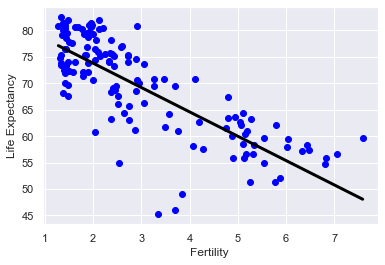

In [18]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

# Create the regression model: reg_alL
reg = LinearRegression()

# Fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

# Print accuracy
print(reg.score(x_fertility, y_life))

# Plot regression Line
plt.scatter(x_fertility, y_life, color='blue')
plt.plot(prediction_space, y_predict, color='black', linewidth=3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility ')
plt.show()

In [19]:
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']
y_life = df['life'].values.reshape(-1,1)
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42) 
# Create the regression model: reg_all
reg_all = LinearRegression()
# Fit the regression to the training data
reg_all.fit(x_train, y_train)
# Print accuracy
print (reg_all.score(features, y_life))

0.8914651485793176


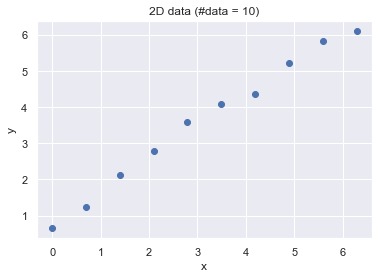

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
N = 10 # number of data points
m = .9
c =  1

x = np.linspace (0,2*np.pi,N)
y = m*x + c + np.random.normal (0,.3,x.shape)

plt.figure()
plt.plot (x,y,'o')
plt.xlabel('x')
plt.ylabel( 'y')
plt.title('2D data (#data = %d)' % N)
plt.show ()

In [21]:
import torch

In [22]:
from torch.utils.data import Dataset

class MyDataset (Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        sample = {
             'feature': torch.tensor( [1,self.x[idx]]),
             'label': torch.tensor([self.y[idx]])}
        return sample      

In [23]:
dataset = MyDataset(x, y)

for i in range (len (dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([0.6432], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.2378], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.1367], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([2.7979], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.5987], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.0992], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.3671], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.2168], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([5.8301], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.1196], dtype=torch.float64)


In [24]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 0
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [25]:
import pprint as pp
for i_batch, samples in enumerate (dataloader):
    print ('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp. pprint (samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 4.8869],
        [1.0000, 2.7925],
        [1.0000, 6.2832],
        [1.0000, 0.6981]], dtype=torch.float64),
 'label': tensor([[5.2168],
        [3.5987],
        [6.1196],
        [1.2378]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 0.0000],
        [1.0000, 2.0944],
        [1.0000, 3.4907],
        [1.0000, 4.1888]], dtype=torch.float64),
 'label': tensor([[0.6432],
        [2.7979],
        [4.0992],
        [4.3671]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 5.5851],
        [1.0000, 1.3963]], dtype=torch.float64),
 'label': tensor([[5.8301],
        [2.1367]], dtype=torch.float64)}


In [26]:
import torch.nn as nn
import torch.nn.functional as F

class MyModel (nn.Module):
    def __init__(self, input_dim, output_dim):
        super (MyModel, self).__init__()
        self.linear = nn.Linear (input_dim, output_dim)
    def forward (self, x):
        out = self.linear (x)
        return out

In [27]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim) 

In [28]:
cost = nn.MSELoss()

In [29]:
# How many times the entire training data is seen? 
num_epochs = 10
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters (), lr = l_rate)
dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 0

training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range (num_epochs):
  print('Epoch = %s' % epoch)
  for batch_i, samples in enumerate(training_sample_generator):
    predictions = model(samples['feature'].float())
    error = cost(predictions, samples['label'].float())
    optimiser.zero_grad()
    error.backward()
    optimiser.step()
    print ('\tBatch = %s, Error = %s' % (batch_i, error.item()))

Epoch = 0
	Batch = 0, Error = 4.422854423522949
	Batch = 1, Error = 2.353456974029541
	Batch = 2, Error = 1.7074828147888184
Epoch = 1
	Batch = 0, Error = 0.5712254643440247
	Batch = 1, Error = 0.33230340480804443
	Batch = 2, Error = 0.5937787890434265
Epoch = 2
	Batch = 0, Error = 0.3479509651660919
	Batch = 1, Error = 0.20996186137199402
	Batch = 2, Error = 0.2132394164800644
Epoch = 3
	Batch = 0, Error = 0.4083797335624695
	Batch = 1, Error = 0.16813117265701294
	Batch = 2, Error = 0.09877366572618484
Epoch = 4
	Batch = 0, Error = 0.2924173176288605
	Batch = 1, Error = 0.2277808040380478
	Batch = 2, Error = 0.15898136794567108
Epoch = 5
	Batch = 0, Error = 0.3024711608886719
	Batch = 1, Error = 0.24410974979400635
	Batch = 2, Error = 0.006717217620462179
Epoch = 6
	Batch = 0, Error = 0.2828276753425598
	Batch = 1, Error = 0.20521411299705505
	Batch = 2, Error = 0.013291018083691597
Epoch = 7
	Batch = 0, Error = 0.13599315285682678
	Batch = 1, Error = 0.30047503113746643
	Batch = 2, 

In [30]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print ('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print ('y_for_plotting shape:', y_for_plotting.shape)


Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


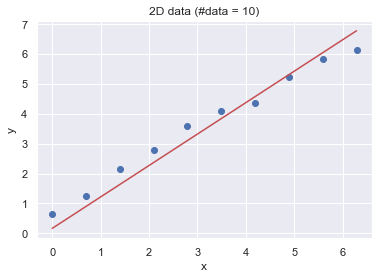

In [31]:
plt.figure()
plt.plot (x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel( 'y')
plt.title('2D data (#data = %d)' % N)
plt.show ()

# Recommendation Systems

In [32]:
import math

In [33]:
def cosine_similarity(v1, v2, metric='cosine'):
    #metric: cosine or correlation
    if metric == 'correlation':
      v1 = v1 - np.nanmean (v1)
      v2 = v2 - np.nanmean (v2)
    "compute similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; 
        y = v2[i]
        if np.isnan(x) or np.isnan(y): continue
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

In [34]:
def sim_matrix(M, dimension='user', metric='cosine'):
  N = M. shape [0] if dimension == 'user' else M.shape[1]
  sim = np.zeros ( [N,N])
  for i in range (N):
      for j in range (N):
            if i == j:
                sim[i,j] = 0 #Cancel out the effect of self-similarity in the sums later
                continue
            if dimension == 'user':
                v1, v2 = M[i,:], M[j,:]
            else:
                v1, v2 = M[:,i], M[:,j]
            sim[i] [j] = cosine_similarity(v1,v2, metric) 
  return sim

In [35]:
def user_cf (M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean (M, axis=1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range(n_items):
             if np.isnan(M[i,j]):
                 pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[ :,j]-avg_ratings)) / sum(sim_users[i]) 
    return pred

In [36]:
def item_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=0)
    sim_items = sim_matrix(M, 'item', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                 pred[i,j] =   avg_ratings[j] + np.nansum(sim_items[j] * (M[i, :] - avg_ratings)) / sum(sim_items[j]) 
    return pred

In [37]:
def evaluateRS(ratings, groundtruth, method='user_cf', metric='cosine'):
  if method == 'user_cf':
    prediction = user_cf(ratings, metric)
  else:
    prediction = item_cf(ratings, metric)
    MSE = mean_squared_error(prediction, groundtruth)
    RMSE = round(math.sqrt(MSE),3)
    print("RMSE using {0} approach ({2}) is: {1}".format(method, RMSE, metric))
    print(pd.DataFrame(prediction))
    return

In [38]:
M_result = np.asarray([[4,3,2,3], 
 [1,2,3,1],
 [1,2,1,2],
 [4,3,2,4]])
pd.DataFrame(M_result)

M = np.asarray([[4,3,2,3], 
 [1,2,3,1],
 [np.nan,2,1,np.nan],
 [4,3,np.nan,np.nan],
])

In [39]:
print(M.shape)
print(np.nanmean(M, axis=0))
pd.DataFrame(M)

(4, 4)
[3.  2.5 2.  2. ]


,0,1,2,3
0,4.0,3.0,2.0,3.0
1,1.0,2.0,3.0,1.0
2,NaN,2.0,1.0,NaN
3,4.0,3.0,NaN,NaN


In [40]:
evaluateRS(M, M_result, 'user_cf', 'cosine')
evaluateRS(M, M_result, 'user_cf', 'correlation')
evaluateRS(M, M_result, 'item cf', 'cosine')
evaluateRS(M, M_result, 'item cf', 'correlation')

RMSE using item cf approach (cosine) is: 0.558
         0    1         2         3
0  4.00000  3.0  2.000000  3.000000
1  1.00000  2.0  3.000000  1.000000
2  2.54758  2.0  1.000000  1.537748
3  4.00000  3.0  2.489861  2.537748
RMSE using item cf approach (correlation) is: 0.657
          0    1         2        3
0  4.000000  3.0  2.000000  3.00000
1  1.000000  2.0  3.000000  1.00000
2  3.424268  2.0  1.000000  2.16681
3  4.000000  3.0  2.558482  3.16681


In [41]:
# results = []
# for method in ['user_cf', 'item_cf']:
#     for metric in ['cosine', 'correlation']:
#         rank_acc = evaluateRS(M, M_result, method, metric)
#         results += ["Rank accuracy of {0} with {1} metric: {2}".format(method[1], metric, rank_acc)]
# print("\n".join(results))